In [19]:
import pandas as pd

# load in the LSTM_results.csv file
LSTM_sentiment_results = pd.read_csv('LSTM_results_optimal_sentiment.csv', index_col=0)

# rename the columns
LSTM_sentiment_results.columns = ['Optimal Tickers', 'Optimal Weights', 'Estimated Return', 'Estimated Risk']

In [20]:
LSTM_sentiment_results

,Optimal Tickers,Optimal Weights,Estimated Return,Estimated Risk
Date,,,,
2019-10-01,"['SCHW', 'GE', 'AMT', 'PRU', 'DPZ', 'WBD', 'CP...",[0.34627356 0.1897269 0.09949946 0.08681844 0...,1.203009,0.075959
2019-10-02,"['GLW', 'HST', 'AMAT', 'MCO', 'EXPE', 'AJG', '...",[0.2319905 0.18684886 0.16337601 0.15390055 0...,1.220891,0.074463
2019-10-03,"['ILMN', 'EXPD', 'DPZ', 'ZTS', 'AFL', 'MAS', '...",[0.2519471 0.21949571 0.19051257 0.11514867 0...,2.022296,0.120565
2019-10-04,"['EOG', 'DPZ', 'MCO', 'FDS', 'AAL', 'TJX', 'TR...",[0.33199249 0.18281423 0.17762663 0.09211612 0...,1.476118,0.075452
2019-10-07,"['EXPD', 'LEN', 'DPZ', 'LUV', 'ON', 'ZION', 'F...",[0.27457247 0.20770221 0.15770752 0.12065394 0...,2.045425,0.122968
...,...,...,...,...
2019-12-23,"['GLW', 'CL', 'ABC', 'NI', 'F', 'ILMN', 'CRM',...",[0.1985782 0.18800274 0.17574881 0.14843537 0...,1.130256,0.070252
2019-12-24,"['PEAK', 'ABC', 'PNW', 'ATVI', 'WBA', 'ACN', '...",[0.45093932 0.12979401 0.1223215 0.09301729 0...,1.198215,0.067827
2019-12-26,"['PEAK', 'IBM', 'NWS', 'MOH', 'ZBRA', 'EXR', '...",[0.53874921 0.12298424 0.12091845 0.0713481 0...,1.102019,0.064420


In [21]:
def parse_weights_string(weights_str):
    weights_str = weights_str.replace("[", "").replace("]", "").replace("\r\n", "").replace(",", " ").strip()  # Remove unwanted characters
    weights_list = [float(w) for w in weights_str.split()]  # Split and convert elements to float
    return weights_list

In [22]:
# for each day in the LSTM_results dataframe, parse the weights string and add it to the dataframe
for i in range(len(LSTM_sentiment_results)):
    LSTM_sentiment_results['Optimal Weights'][i] = parse_weights_string(LSTM_sentiment_results['Optimal Weights'][i])

C:\Users\nicol\AppData\Local\Temp\ipykernel_4928\536690649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM_sentiment_results['Optimal Weights'][i] = parse_weights_string(LSTM_sentiment_results['Optimal Weights'][i])


In [23]:
# make the index to be the date
LSTM_sentiment_results.index = pd.to_datetime(LSTM_sentiment_results.index)

In [24]:
LSTM_sentiment_results

,Optimal Tickers,Optimal Weights,Estimated Return,Estimated Risk
Date,,,,
2019-10-01,"['SCHW', 'GE', 'AMT', 'PRU', 'DPZ', 'WBD', 'CP...","[0.34627356, 0.1897269, 0.09949946, 0.08681844...",1.203009,0.075959
2019-10-02,"['GLW', 'HST', 'AMAT', 'MCO', 'EXPE', 'AJG', '...","[0.2319905, 0.18684886, 0.16337601, 0.15390055...",1.220891,0.074463
2019-10-03,"['ILMN', 'EXPD', 'DPZ', 'ZTS', 'AFL', 'MAS', '...","[0.2519471, 0.21949571, 0.19051257, 0.11514867...",2.022296,0.120565
2019-10-04,"['EOG', 'DPZ', 'MCO', 'FDS', 'AAL', 'TJX', 'TR...","[0.33199249, 0.18281423, 0.17762663, 0.0921161...",1.476118,0.075452
2019-10-07,"['EXPD', 'LEN', 'DPZ', 'LUV', 'ON', 'ZION', 'F...","[0.27457247, 0.20770221, 0.15770752, 0.1206539...",2.045425,0.122968
...,...,...,...,...
2019-12-23,"['GLW', 'CL', 'ABC', 'NI', 'F', 'ILMN', 'CRM',...","[0.1985782, 0.18800274, 0.17574881, 0.14843537...",1.130256,0.070252
2019-12-24,"['PEAK', 'ABC', 'PNW', 'ATVI', 'WBA', 'ACN', '...","[0.45093932, 0.12979401, 0.1223215, 0.09301729...",1.198215,0.067827
2019-12-26,"['PEAK', 'IBM', 'NWS', 'MOH', 'ZBRA', 'EXR', '...","[0.53874921, 0.12298424, 0.12091845, 0.0713481...",1.102019,0.064420


In [25]:
optimal_weights_dict = {}

# Iterate over each row in LSTM_results
for date, row in LSTM_sentiment_results.iterrows():
    # Extract the optimal tickers and their corresponding weights
    tickers = eval(row['Optimal Tickers'])
    weights = row['Optimal Weights']
    
    # Check if the length of tickers matches the length of weights
    if len(tickers) != len(weights):
        print(f"Error: Length of tickers ({len(tickers)}) does not match the length of weights ({len(weights)})")
        continue
    
    # Create a dictionary entry with tickers as keys and weights as values
    optimal_weights_dict[date] = dict(zip(tickers, weights))

# Print the optimal weights dictionary
print(optimal_weights_dict)

{Timestamp('2019-10-01 00:00:00'): {'SCHW': 0.34627356, 'GE': 0.1897269, 'AMT': 0.09949946, 'PRU': 0.08681844, 'DPZ': 0.08491856, 'WBD': 0.05262489, 'CPRT': 0.04427729, 'TECH': 0.04093244, 'CTLT': 0.03567428, 'WFC': 0.01925418}, Timestamp('2019-10-02 00:00:00'): {'GLW': 0.2319905, 'HST': 0.18684886, 'AMAT': 0.16337601, 'MCO': 0.15390055, 'EXPE': 0.12667501, 'AJG': 0.07417155, 'KO': 0.04096697, 'MAR': 0.01446065, 'TECH': 0.00726648, 'MAA': 0.00034342}, Timestamp('2019-10-03 00:00:00'): {'ILMN': 0.2519471, 'EXPD': 0.21949571, 'DPZ': 0.19051257, 'ZTS': 0.11514867, 'AFL': 0.05697609, 'MAS': 0.05157135, 'CCL': 0.04994236, 'MCO': 0.03477977, 'BAC': 0.02416204, 'FMC': 0.00546434}, Timestamp('2019-10-04 00:00:00'): {'EOG': 0.33199249, 'DPZ': 0.18281423, 'MCO': 0.17762663, 'FDS': 0.09211612, 'AAL': 0.08062089, 'TJX': 0.04319397, 'TRMB': 0.03427929, 'A': 0.02727368, 'NKE': 0.02611263, 'PFG': 0.00397008}, Timestamp('2019-10-07 00:00:00'): {'EXPD': 0.27457247, 'LEN': 0.20770221, 'DPZ': 0.15770752,

In [26]:
# obtain 63-day price movement for each ticker
stock_data = pd.read_csv('SP500_stock_prices.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data[stock_data['Date'] >= '2019-10-01']
stock_data = stock_data[stock_data['Date'] <= '2020-04-02']
stock_data = stock_data[['Date', 'Ticker', 'Close']]
# Make Date the index
stock_data = stock_data.set_index('Date')
# make the index to be the date
stock_data.index = pd.to_datetime(stock_data.index)

# Calculate returns over 63 business days
# select only the ticker index
indiviual_datas = []

for ticker in stock_data['Ticker'].unique():
    #data_ticker = data.xs(0, level=1).copy()
    data_ticker = stock_data[stock_data['Ticker'] == ticker].copy()
    # make target column
    data_ticker['63-day Price Movement'] = data_ticker['Close'].pct_change(63).shift(-63)
    data_ticker.dropna(inplace=True)
    data_ticker

    indiviual_datas.append(data_ticker)

data_all_tickers = pd.concat(indiviual_datas)
data_all_tickers

,Ticker,Close,63-day Price Movement
Date,,,
2019-10-01,MMM,158.380005,0.113903
2019-10-02,MMM,155.649994,0.156441
2019-10-03,MMM,155.229996,0.149584
2019-10-04,MMM,155.820007,0.146323
2019-10-07,MMM,153.520004,0.158807
...,...,...,...
2019-12-24,ZTS,132.919998,-0.112925
2019-12-26,ZTS,133.029999,-0.159814
2019-12-27,ZTS,133.250000,-0.124353


In [27]:
# use the optimal_weights_dict to extract the 63-day Price Movement for each ticker on each day
# create a new df called stock_returns
stock_returns = pd.DataFrame()

# iterate over each date in optimal_weights_dict
for date, weights in optimal_weights_dict.items():
    # extract the 63-day Price Movement for each ticker on that day
    date_returns = data_all_tickers.loc[date].copy()
    # add the weights to the dataframe
    date_returns['Weight'] = date_returns['Ticker'].map(weights)
    # append the date_returns dataframe to stock_returns
    stock_returns = stock_returns.append(date_returns)

In [28]:
# Make a new column called 'Weighted Returns'
stock_returns['Weighted Returns'] = stock_returns['Weight'] * stock_returns['63-day Price Movement']
# remove all rows with NaN values
stock_returns.dropna(inplace=True)
stock_returns

,Ticker,Close,63-day Price Movement,Weight,Weighted Returns
Date,,,,,
2019-10-01,AMT,220.889999,0.040427,0.099499,0.004023
2019-10-01,TECH,47.419998,0.157265,0.040932,0.006437
2019-10-01,CTLT,47.209999,0.192544,0.035674,0.006869
2019-10-01,SCHW,37.759998,0.259534,0.346274,0.089870
2019-10-01,CPRT,39.764999,0.143468,0.044277,0.006352
...,...,...,...,...,...
2019-12-30,TAP,53.779999,-0.274637,0.014803,-0.004065
2019-12-30,PNW,89.250000,-0.150812,0.180336,-0.027197
2019-12-30,PRU,92.879997,-0.438630,0.064207,-0.028163


In [29]:
# make a new dictionary called portfolio_returns_dict to store the portfolio returns for each day
portfolio_returns_dict = {}

# Iterate over each row in stock_returns
for date, row in stock_returns.iterrows():
    # Extract the weighted returns
    weighted_returns = row['Weighted Returns']
    
    # Check if the date already exists in the dictionary
    if date in portfolio_returns_dict:
        # If it does, add the weighted returns to the existing value
        portfolio_returns_dict[date] += weighted_returns
    else:
        # If it doesn't, set the weighted returns as the value
        portfolio_returns_dict[date] = weighted_returns
        

In [30]:
# make a new column in LSTM_results called 'Actual Returns'
LSTM_sentiment_results['Actual Returns'] = LSTM_sentiment_results.index.map(portfolio_returns_dict)

In [31]:
# multiply the 'Actual Returns', Estimated Return and Estimated Risk columns by 100
LSTM_sentiment_results['Actual Returns'] = LSTM_sentiment_results['Actual Returns'] * 100
LSTM_sentiment_results['Estimated Return'] = LSTM_sentiment_results['Estimated Return'] * 100
LSTM_sentiment_results['Estimated Risk'] = LSTM_sentiment_results['Estimated Risk'] * 100
# Rename the columns
LSTM_sentiment_results.columns = ['Optimal Tickers', 'Optimal Weights', 'Estimated Returns (%)', 'Estimated Risk (%)', 'Actual Returns (%)']
LSTM_sentiment_results

,Optimal Tickers,Optimal Weights,Estimated Returns (%),Estimated Risk (%),Actual Returns (%)
Date,,,,,
2019-10-01,"['SCHW', 'GE', 'AMT', 'PRU', 'DPZ', 'WBD', 'CP...","[0.34627356, 0.1897269, 0.09949946, 0.08681844...",120.300943,7.595935,20.635208
2019-10-02,"['GLW', 'HST', 'AMAT', 'MCO', 'EXPE', 'AJG', '...","[0.2319905, 0.18684886, 0.16337601, 0.15390055...",122.089051,7.446293,11.179748
2019-10-03,"['ILMN', 'EXPD', 'DPZ', 'ZTS', 'AFL', 'MAS', '...","[0.2519471, 0.21949571, 0.19051257, 0.11514867...",202.229570,12.056458,12.753179
2019-10-04,"['EOG', 'DPZ', 'MCO', 'FDS', 'AAL', 'TJX', 'TR...","[0.33199249, 0.18281423, 0.17762663, 0.0921161...",147.611772,7.545187,18.273280
2019-10-07,"['EXPD', 'LEN', 'DPZ', 'LUV', 'ON', 'ZION', 'F...","[0.27457247, 0.20770221, 0.15770752, 0.1206539...",204.542516,12.296811,10.187943
...,...,...,...,...,...
2019-12-23,"['GLW', 'CL', 'ABC', 'NI', 'F', 'ILMN', 'CRM',...","[0.1985782, 0.18800274, 0.17574881, 0.14843537...",113.025642,7.025209,-20.099691
2019-12-24,"['PEAK', 'ABC', 'PNW', 'ATVI', 'WBA', 'ACN', '...","[0.45093932, 0.12979401, 0.1223215, 0.09301729...",119.821489,6.782715,-20.222696
2019-12-26,"['PEAK', 'IBM', 'NWS', 'MOH', 'ZBRA', 'EXR', '...","[0.53874921, 0.12298424, 0.12091845, 0.0713481...",110.201944,6.442042,-25.751682


In [32]:
# save the LSTM_results dataframe to a csv file
LSTM_sentiment_results.to_csv('LSTM_sentiment_results_optimal.csv')

In [34]:
# calculate the average and standard deviation of the 'Actual Returns' column and print them
print(f"Average Return: {LSTM_sentiment_results['Actual Returns (%)'].mean()}")
print(f"Standard Deviation of Return: {LSTM_sentiment_results['Actual Returns (%)'].std()}")

Average Return: -0.4794515204813417
Standard Deviation of Return: 15.956837734814988


<Axes: title={'center': 'Actual Returns vs Estimated Returns'}, xlabel='Date'>

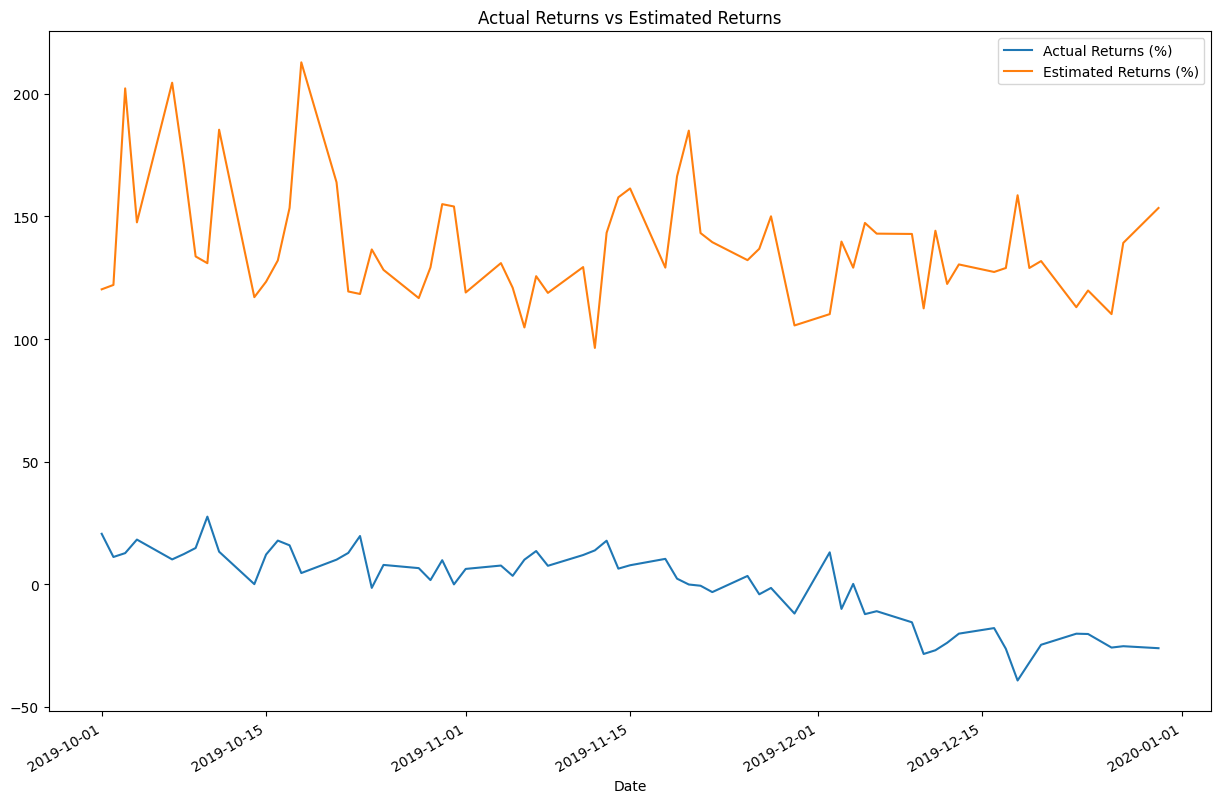

In [35]:
# plot actual returns vs estimated returns
LSTM_sentiment_results.plot(y = ['Actual Returns (%)', 'Estimated Returns (%)'], figsize=(15, 10), title='Actual Returns vs Estimated Returns')